# Mini Project 2 - Housing Prediction

Objective
* Determine what key variables predict housing prices
* Predict the house price 1 year, 2 years, 5 years from today
* Is it a good investment to buy a house today?
* Is it a good investment to sell a house today?

Steps
1. Load and explore data
2. Build linear regression model
3. Predict house sale price
4. Iterate and improve model

## 1. Load and Explore Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

print('Numpy: ', np.__version__)
print('Pandas: ', pd.__version__)
print('Seaborn: ', sns.__version__)

Numpy:  1.17.2
Pandas:  0.25.1
Seaborn:  0.9.0


In [3]:
# Load data
house = pd.read_csv('../../Data/ames-housing.csv')
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Check shape
house.shape

(1460, 81)

In [5]:
# Check column names
house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
# Check data type
pd.set_option('display.max_rows', 81)
house.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [7]:
# Check null values
house.isnull().sum()[house.isnull().sum() > 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [8]:
house.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [9]:
house['OverallQual'].describe()

count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64

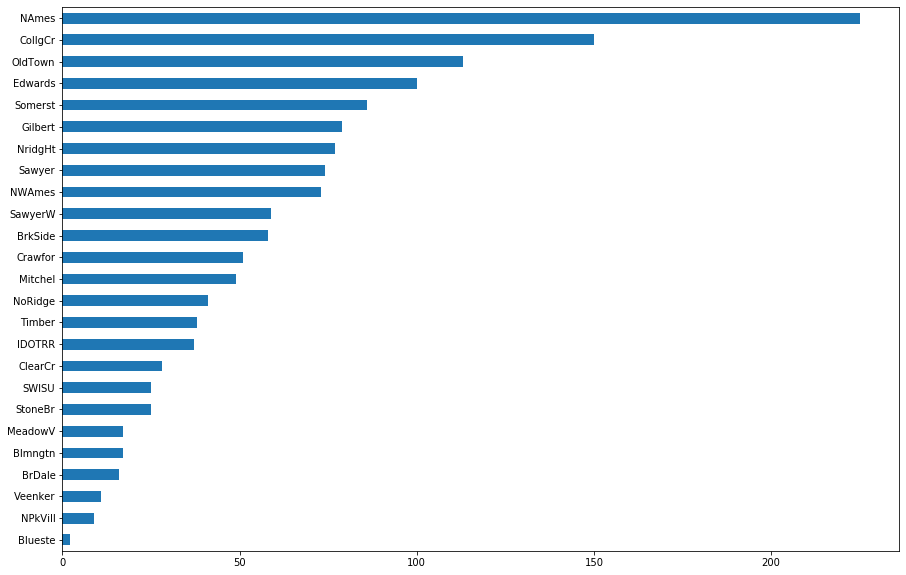

In [10]:
house['Neighborhood'].value_counts().sort_values().plot(kind='barh', figsize=(15,10));

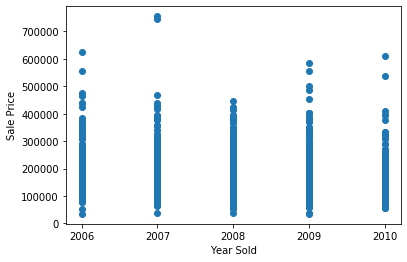

In [11]:
# Plot YrSold versus SalePrice
import matplotlib.pyplot as plt
plt.scatter(house['YrSold'], house['SalePrice'])

# Show only intergers, no decimals
import math
xint = range(min(house['YrSold']), math.ceil(max(house['YrSold']))+1)
plt.xticks(xint)
plt.xlabel('Year Sold')
plt.ylabel('Sale Price')
plt.show()

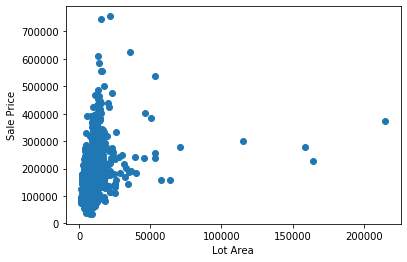

In [12]:
# Plot LotArea versus SalePrice
# LotArea defined as: Lot size in square feet
plt.scatter(house['LotArea'], house['SalePrice'])
plt.xlabel('Lot Area')
plt.ylabel('Sale Price')
plt.show()

Would like to identify and remove the outliers, likely where the Lot Area > 100,000. But let's reach a prediction value first then go back and refine.

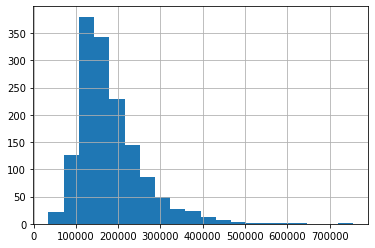

In [13]:
# Visualise distribution of price
house['SalePrice'].hist(bins=20)
plt.show()

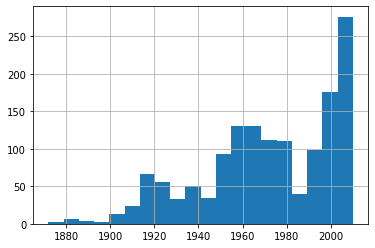

In [14]:
# Visualise distribution of Year when property was built
house['YearBuilt'].hist(bins=20)
plt.show()

In [15]:
# Looking at price trend over the period of the data provide
YearMeanPrice=house.groupby('YrSold')['SalePrice'].mean()
print(YearMeanPrice)

YrSold
2006    182549.458599
2007    186063.151976
2008    177360.838816
2009    179432.103550
2010    177393.674286
Name: SalePrice, dtype: float64


## 2. Build the Model

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
# For the first iteration, we are going to use LotArea as the predictor variable for SalePrice

# Reshape the data into 2D array
X = house['LotArea'].values.reshape(-1,1)
y = house['SalePrice'].values.reshape(-1,1)

# Find coefficient and intercept using linear regression
linreg = LinearRegression()
linreg.fit(X, y)
print('Coefficient:', linreg.coef_, 'Intercept:', linreg.intercept_)

# Find R^2
print('R^2:', linreg.score(X, y))

Coefficient: [[2.09997195]] Intercept: [158836.15189688]
R^2: 0.0696133153821118


In [18]:
# Split the data
from sklearn.model_selection import train_test_split

# Create training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [19]:
# Check shape and sample of test train data
print('X = Lot Area')
print('X_train is a',  type(X_train))
print('X_train rows:', X_train.shape[0])
print('Sample of X_train:')
print(X_train[:10])
print('')
print('y = Sale Price')
print('y_train is a',  type(y_train))
print('y_train rows:', y_train.shape[0])
print('Sample of y_train:')
print(y_train[:10])

X = Lot Area
X_train is a <class 'numpy.ndarray'>
X_train rows: 1168
Sample of X_train:
[[29959]
 [ 8450]
 [18450]
 [11103]
 [ 8923]
 [ 8400]
 [ 9819]
 [10440]
 [10206]
 [10159]]

y = Sale Price
y_train is a <class 'numpy.ndarray'>
y_train rows: 1168
Sample of y_train:
[[248000]
 [185000]
 [129000]
 [155835]
 [134500]
 [144000]
 [196000]
 [157500]
 [ 82000]
 [395192]]


In [20]:
# Find fit model using X_train, y_train
linreg.fit(X_train, y_train)
print('Coefficient: ', linreg.coef_, 'Intercept:', linreg.intercept_)

# Find score using X_test, y_test
print('R^2:', linreg.score(X_test, y_test))

Coefficient:  [[2.05177579]] Intercept: [158844.3451314]
R^2: 0.08933299815882423


In [21]:
# Calculate Mean Squared Error
from sklearn.metrics import mean_squared_error
from math import sqrt

preds = linreg.predict(X_test)
mse = sqrt(mean_squared_error(y_test, preds))
print('Mean Squared Error:', mse)

Mean Squared Error: 79041.0834418499


## 3. Predict House Sale Price

In [22]:
# Check there if a fit model
linreg.intercept_, linreg.coef_

(array([158844.3451314]), array([[2.05177579]]))

In [23]:
# Predict price if Lot Area = 10000
x = [[10000]]
Ypred = linreg.predict(x)
print('Predicted house sale price:', Ypred)

Predicted house sale price: [[179362.10307061]]


In [24]:
# Predict price if Lot Area = 50000
x = [[50000]]
Ypred = linreg.predict(x)
print('Predicted house sale price:', Ypred)

Predicted house sale price: [[261433.13482744]]


In [25]:
# Predict price if Lot Area = 150000
x = [[150000]]
Ypred = linreg.predict(x)
print('Predicted house sale price:', Ypred)

Predicted house sale price: [[466610.71421952]]


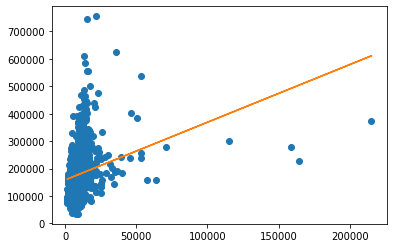

In [26]:
# Plot x and y
e = house['LotArea']
f = house['SalePrice']
plt.plot(e, f, 'o')

m, b = np.polyfit(e, f, 1)
plt.plot(e, m*e + b)
plt.show()

## 4. Iterate and Improve Model
Let's experiment with adding multiple features to see if it improves the R^2 score

In [27]:
# This is the original model to beat
X = house['LotArea'].values.reshape(-1,1)
y = house['SalePrice'].values.reshape(-1,1)
linreg = LinearRegression()
linreg.fit(X, y)
print('Coefficient:', linreg.coef_, 'Intercept:', linreg.intercept_)
# Find R^2
print('R^2:', linreg.score(X, y))

Coefficient: [[2.09997195]] Intercept: [158836.15189688]
R^2: 0.0696133153821118


In [28]:
# Add in more features
X = house[['LotArea', 'YrSold']]
y = house['SalePrice']

# Split the data


# Find coefficient and intercept using linear regression
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)
print('Coefficient:', linreg.coef_, 'Intercept:', linreg.intercept_)

# Find R^2
print('R^2:', linreg.score(X, y))

Coefficient: [    2.09711551 -1505.28728351] Intercept: 3181205.7138581015
R^2: 0.07024646007626789


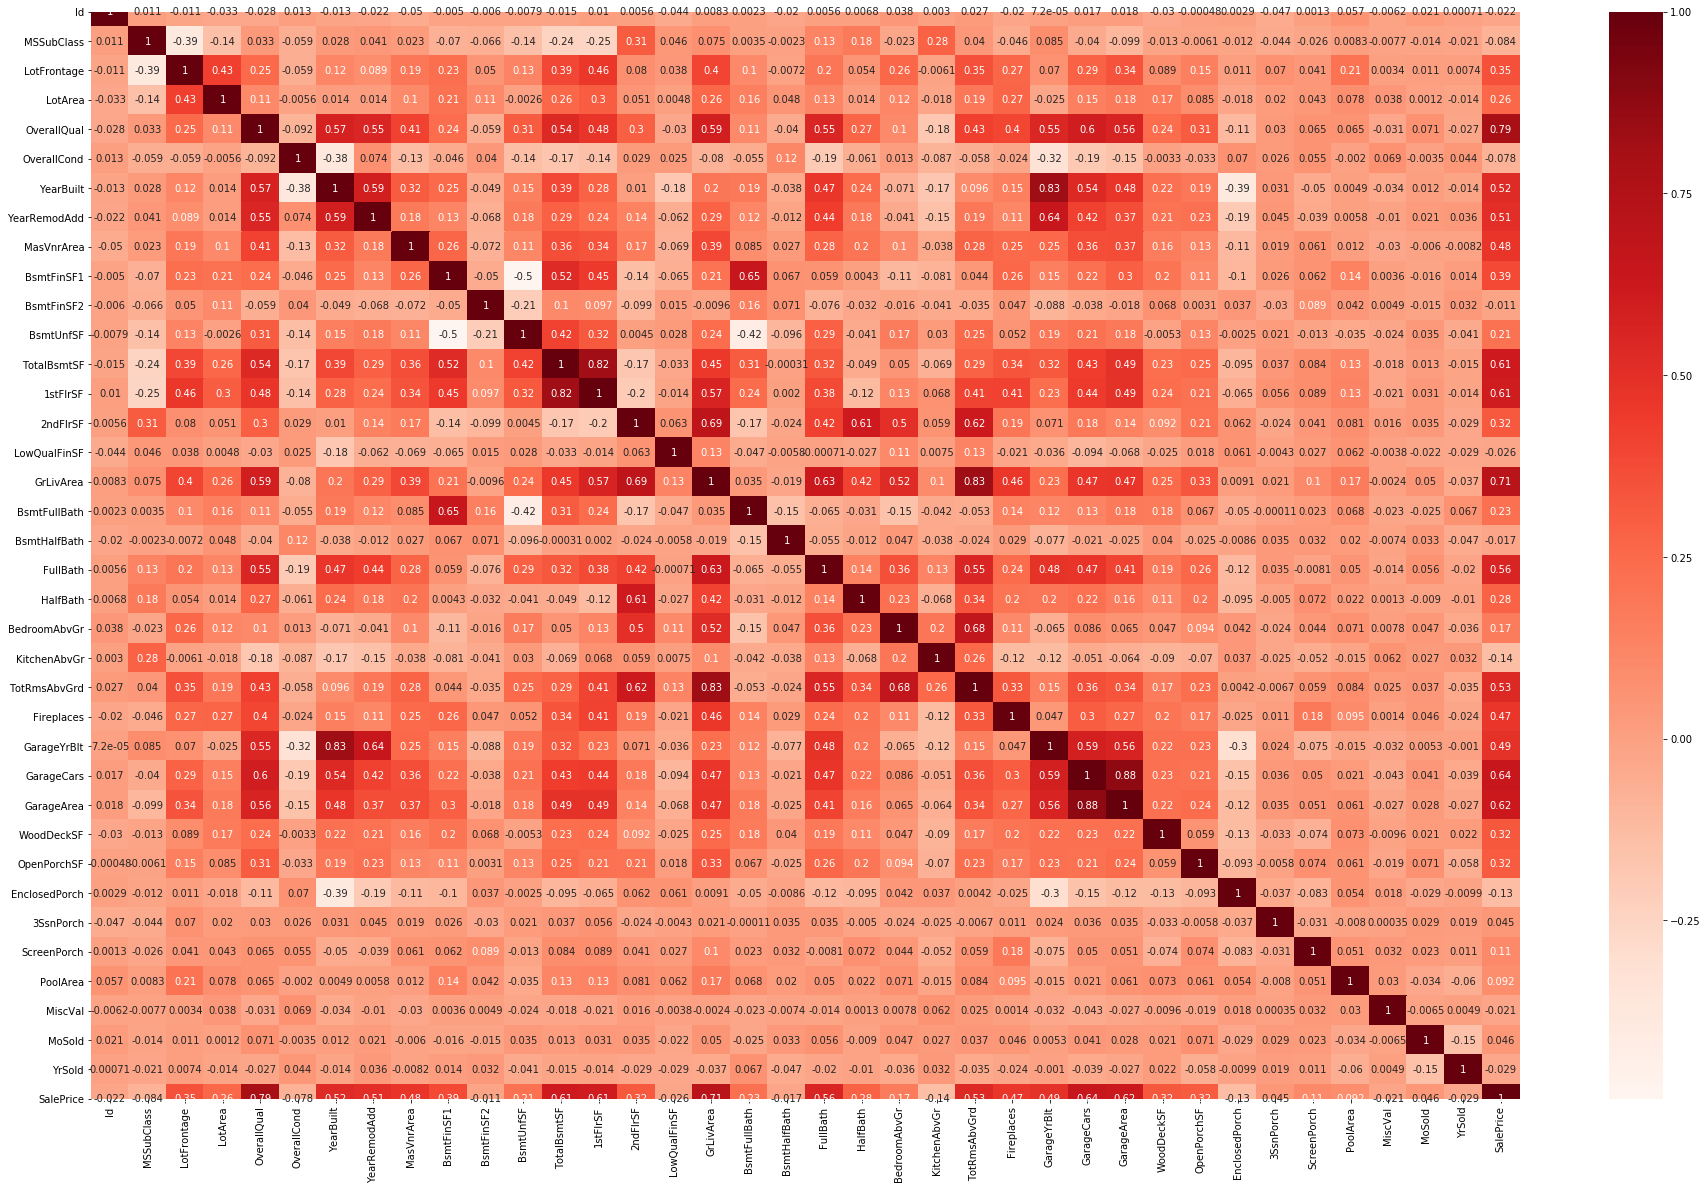

In [29]:
# Use heatmap to explore what other features to include
plt.figure(figsize=(32,20))
cor = house.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [30]:
# Correlation with target variable
cor_target = abs(cor['SalePrice'])

# Select highligh correlated features
relevant_features = cor_target[cor_target>0.5].sort_values(ascending=False)
relevant_features

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

In [31]:
house['OverallQual'].describe()

count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64

In [32]:
# Of theses top variables, let's visualize the correlations
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']
house[cols].corr()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
SalePrice,1.000000,0.790982,0.708624,0.640409,0.623431,0.613581,0.605852,0.560664,0.533723,0.522897,0.507101
OverallQual,0.790982,1.000000,0.593007,0.600671,0.562022,0.537808,0.476224,0.550600,0.427452,0.572323,0.550684
GrLivArea,0.708624,0.593007,1.000000,0.467247,0.468997,0.454868,0.566024,0.630012,0.825489,0.199010,0.287389
GarageCars,0.640409,0.600671,0.467247,1.000000,0.882475,0.434585,0.439317,0.469672,0.362289,0.537850,0.420622
GarageArea,0.623431,0.562022,0.468997,0.882475,1.000000,0.486665,0.489782,0.405656,0.337822,0.478954,0.371600
TotalBsmtSF,0.613581,0.537808,0.454868,0.434585,0.486665,1.000000,0.819530,0.323722,0.285573,0.391452,0.291066
1stFlrSF,0.605852,0.476224,0.566024,0.439317,0.489782,0.819530,1.000000,0.380637,0.409516,0.281986,0.240379
FullBath,0.560664,0.550600,0.630012,0.469672,0.405656,0.323722,0.380637,1.000000,0.554784,0.468271,0.439046
TotRmsAbvGrd,0.533723,0.427452,0.825489,0.362289,0.337822,0.285573,0.409516,0.554784,1.000000,0.095589,0.191740
YearBuilt,0.522897,0.572323,0.199010,0.537850,0.478954,0.391452,0.281986,0.468271,0.095589,1.000000,0.592855


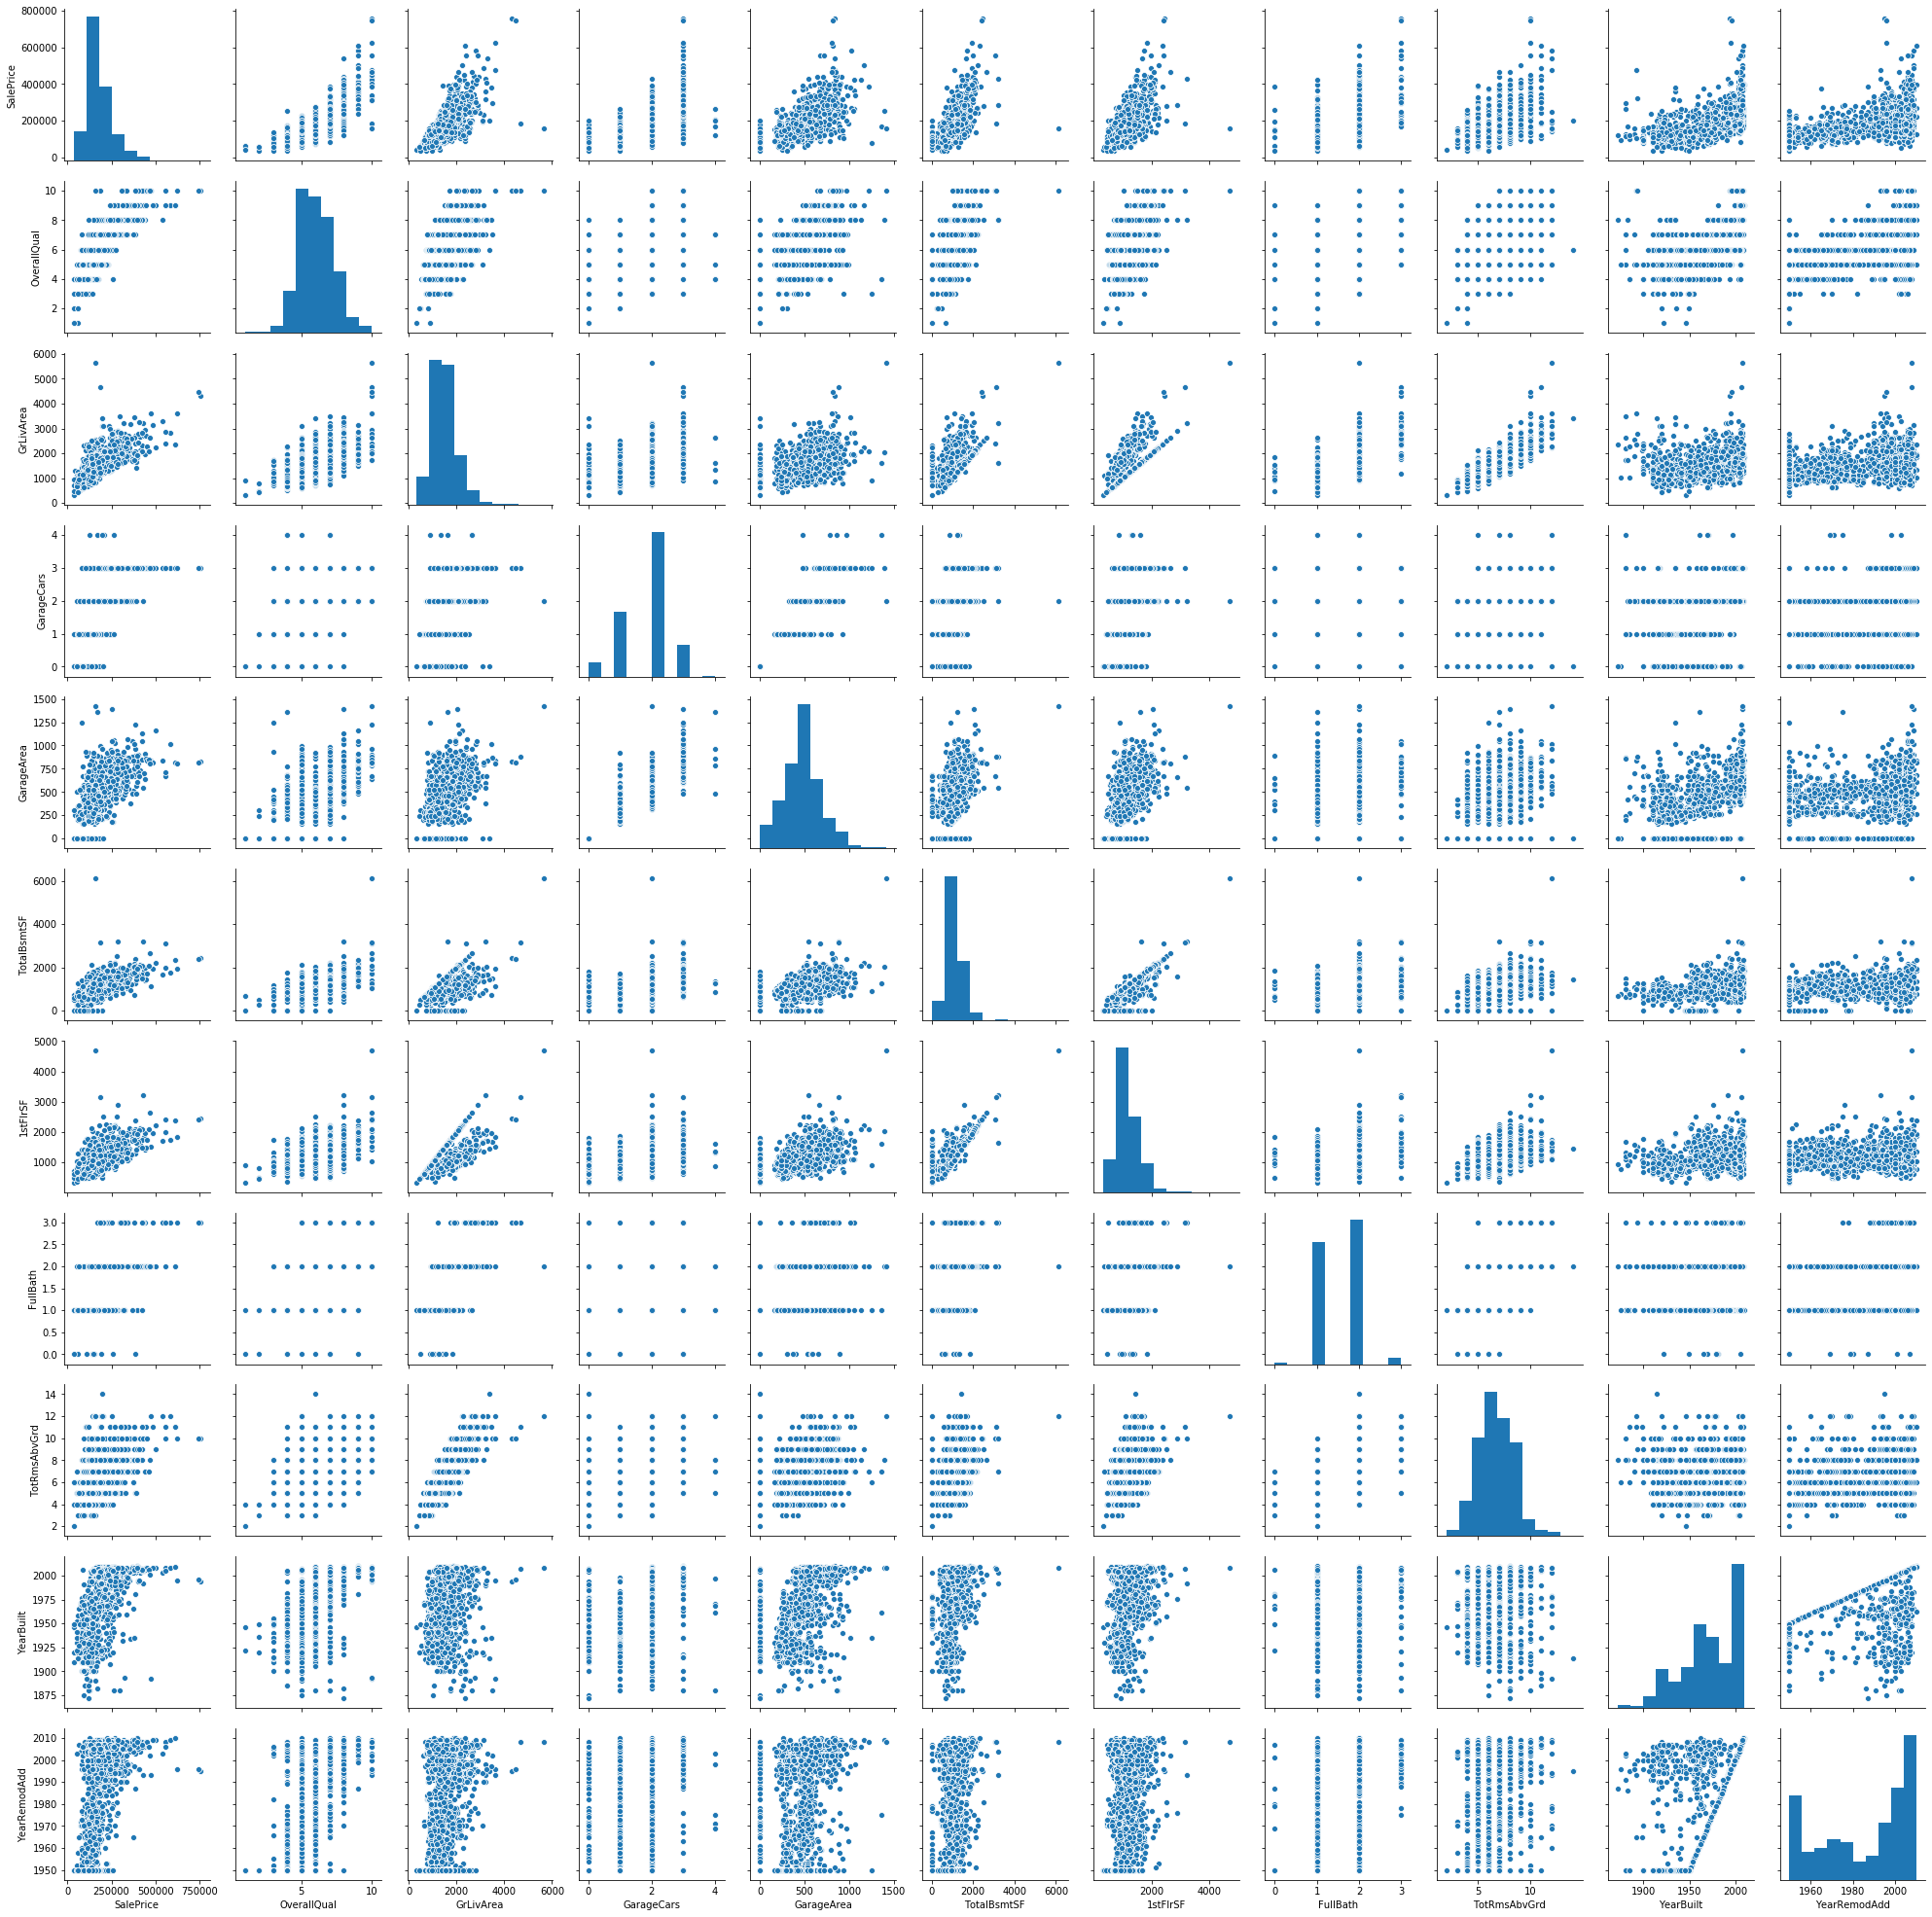

In [33]:
sns.pairplot(house[cols])
plt.show()

In [34]:
house['OverallQual'].describe()

count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64

In [35]:
house['GrLivArea'].describe()

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64

In [36]:
house['GarageArea'].describe()

count    1460.000000
mean      472.980137
std       213.804841
min         0.000000
25%       334.500000
50%       480.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64

In [44]:
# Reshape the data into 2D array
X2 = house[['OverallQual', 'GrLivArea', 'GarageArea']]
y = house['SalePrice']


# Turn this entire thing into a function
# Create training and testing subsets
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size = 0.2)

# Find coefficient and intercept using linear regression
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X2_train, y_train)
print('Coefficient:', linreg.coef_, 'Intercept:', linreg.intercept_)

# Find R^2
print('R^2 train:', linreg.score(X2_train, y_train))
print('R^2 test:', linreg.score(X2_test, y_test))

Coefficient: [28171.47758902    49.42478243    75.42525592] Intercept: -101062.64286019723
R^2 train: 0.7379821815919116
R^2 test: 0.7464418755666924


Predict house prices again using new model

In [38]:
# Check there if a fit model
linreg.intercept_, linreg.coef_

(-100828.03308527323, array([28666.25398983,    48.46496535,    70.86642639]))

In [39]:
# Predict price if OverallQual = 6, GrLivArea = 1515, GarageArea = 472
x = [[6, 1515, 472]]
pred = linreg.predict(x)
print("Predicted Sale Price is ${}".format(round(pred[0], 2)))

Predicted Sale Price is $178042.87


In [40]:
# Find mean squared error
from sklearn.metrics import mean_squared_error
from math import sqrt

preds2 = linreg.predict(X2_test)
mse = sqrt(mean_squared_error(y_test, preds2))
print('Mean Squared Error:', mse)

Mean Squared Error: 42540.00709076755


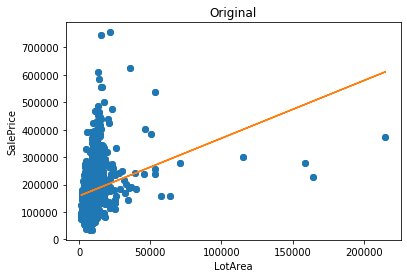

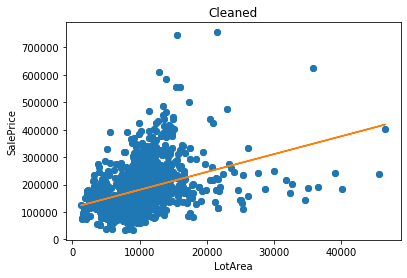

In [41]:
# Clean Lot Area data by excluding: Lot Area > 100,000
# Based on our domain knowledge and one standard dev from mean

print(plt.scatter(house['LotArea'], house['SalePrice']))
plt.title('Original')
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.plot(house['LotArea'], house['SalePrice'], 'o')
m, b = np.polyfit(house['LotArea'], house['SalePrice'], 1)
plt.plot(house['LotArea'], m*house['LotArea'] + b)
plt.show()


house2 = house[house['LotArea'] < 50000]
print(plt.scatter(house2['LotArea'], house2['SalePrice']))
plt.title('Cleaned')
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.plot(house2['LotArea'], house2['SalePrice'], 'o')
m, b = np.polyfit(house2['LotArea'], house2['SalePrice'], 1)
plt.plot(house2['LotArea'], m*house2['LotArea'] + b)
plt.show()

In [42]:
# Original
X = house['LotArea'].values.reshape(-1,1)
y = house['SalePrice'].values.reshape(-1,1)
linreg = LinearRegression()
linreg.fit(X, y)
print('Coefficient:', linreg.coef_, 'Intercept:', linreg.intercept_)
print('R^2:', linreg.score(X, y))

Coefficient: [[2.09997195]] Intercept: [158836.15189688]
R^2: 0.0696133153821118


In [43]:
# Cleaned
X = house2['LotArea'].values.reshape(-1,1)
y = house2['SalePrice'].values.reshape(-1,1)
linreg = LinearRegression()
linreg.fit(X, y)
print('Coefficient:', linreg.coef_, 'Intercept:', linreg.intercept_)
print('R^2:', linreg.score(X, y))

Coefficient: [[6.50119789]] Intercept: [115931.84330288]
R^2: 0.1432662381188956
